# HR Diagram

In this notebook we'll show you how to make an HR diagram of two clusters, and use this to determine their relative distances.

First, we'll load all the Python packages we need.

In [1]:
import numpy as np
import matplotlib 
import matplotlib as mpl

import os

from astropy.timeseries import LombScargle
from astropy.table import Table

# configure notebook for plotting
%pylab inline --no-import-all 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color'] # allows access to colours
# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)    #(6.0,4.0)
matplotlib.rcParams['font.size']=16              #10 
matplotlib.rcParams['savefig.dpi']= 300             #72 

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


## Load some data

Let's pick a data directory from files I prepared earlier. These were from an earlier run of the universe-making code and don't belong to any group in this project!

In [2]:
ddir = '/Users/benjaminpope/code/uqdistanceladder/data/U00/Up/A04/'


In [3]:
stars = Table.read(ddir+'points.txt',format='ascii') 

Where do they lie on the sky? In a nice cluster! 

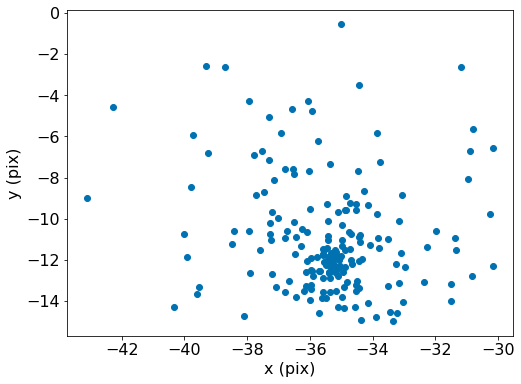

In [4]:
plt.scatter(stars['x'],stars['y'])
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

Let's make an HR diagram. One thing to keep in mind is that our convention of using magnitudes is just to match our modern scale to the Ancient Greeks - in your fantasy universe, you can use whatever units you like (but I recommend that they be logarithmic!). This is an important note - lots of students get hung up on the -2.5 and the solar luminosity, but these are just conventions in our world that aren't important for the physics.

So let's have a simple log scale for magnitude here.

In [5]:
m0, m1, m2 = np.log10(stars['flux1']), np.log10(stars['flux2']), np.log10(stars['flux3']) 
colour = m2-m0

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

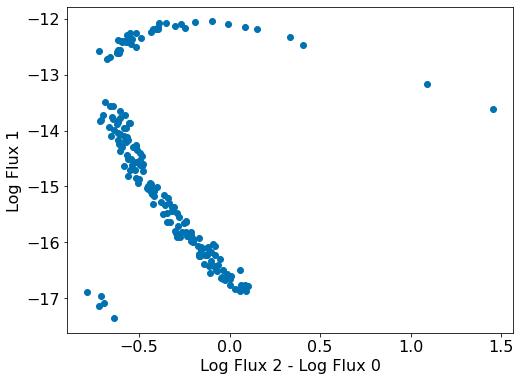

In [6]:
s = plt.scatter(colour,m1)
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

Great! We see a main sequence and a giant branch. Let's look at the parallaxes and see if we can get an absolute distance...

In [7]:
print('Parallaxes: mean %.3f, sd %.3f' % (np.mean(stars['par']),np.std(stars['par'])))

Parallaxes: mean 0.002, sd 0.001


Oh dear. Look at those parallaxes - tiny, some are even negative (this is just noise, and happens in real data!). Useless for an absolute distance determination! 

## Nearby stars as benchmarks

We'll have to find out the distance to this cluster by fitting an HR diagram. Let's look at all the nearby stars and see if we can get something nice.

In [8]:
import glob # this package lets you search for filenames
import os

all_points = glob.glob('/Users/benjaminpope/code/uqdistanceladder/data/U00/*/*/points.txt')

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

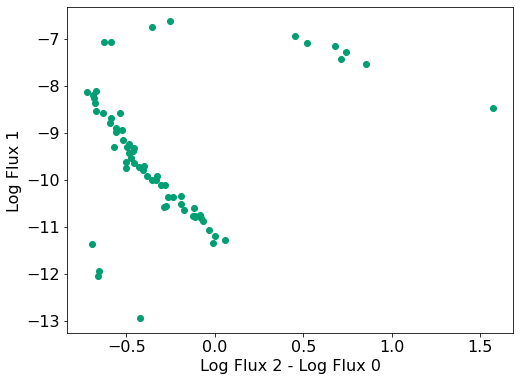

In [9]:
fig, ax1 = plt.subplots(1,1)
for j, point in enumerate(all_points):
    try:
        this = Table.read(point,format='ascii')
        
        thispar = this['par']
        thism0, thism1, thism2 = np.log10(this['flux1']), np.log10(this['flux2']), np.log10(this['flux3']) 
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist) 
        mm = thispar>0.05 # only pick the ones with good signal-to-noise
        
        ax1.scatter(thiscolour[mm],abs_mag[mm],color=colours[1])
    except:
        pass

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

Cool! There are tons of stars in here! 

## Distance Estimation

Let's estimate the distance to this cluster. Let's plot them on the same axes:

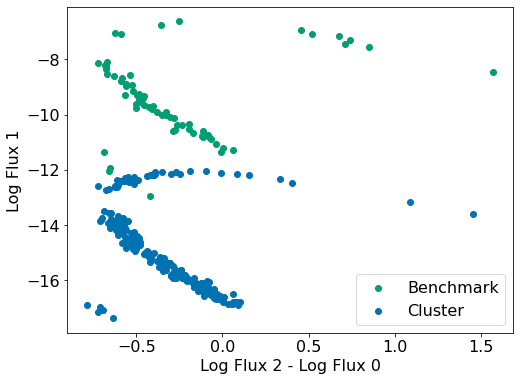

In [10]:
fig = plt.figure()
for j, point in enumerate(all_points):
    try:
        this = Table.read(point,format='ascii')

        thispar = this['par']
        thism0, thism1, thism2 = np.log10(this['flux1']), np.log10(this['flux2']), np.log10(this['flux3']) 
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist)
        mm = thispar>0.05
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color=colours[1])
    except:
        pass

s = plt.scatter(colour,m1,color=colours[0])

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

So this cluster is much further away! By trial and error, let's find a distance modulus that looks right:

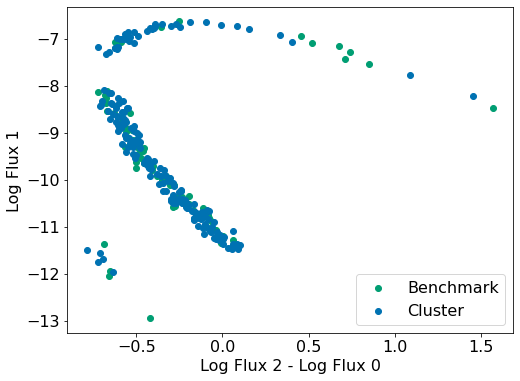

In [11]:
fig = plt.figure()
for j, point in enumerate(all_points):
    try:
        this = Table.read(point,format='ascii')

        thispar = this['par']
        thism0, thism1, thism2 = np.log10(this['flux1']), np.log10(this['flux2']), np.log10(this['flux3']) 
        thiscolour = thism2-thism0
        dist = 1/thispar
        abs_mag = thism1 + 2*np.log10(dist)
        mm = thispar>0.05
        
        h = plt.scatter(thiscolour[mm],abs_mag[mm],color=colours[1])
    except:
        pass

s = plt.scatter(colour,m1+5.4,color=colours[0])

plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

plt.legend([h,s],['Benchmark','Cluster'])

By trial and error it looks like log10(dist) is about (5.4 to 5.5) - so this cluster is at a distance of 10^(2.2 - 2.25) = 500-560 kpc. 

(I looked it up in the answers and it's 520 kpc - so a pretty decent estimate!)